## 1、数据准备

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn
import matplotlib as mpl
import warnings; warnings.simplefilter('ignore')       #忽略警告信息；

from pylab import *
plt.rcParams['font.sans-serif']=['SimHei']             #中文显示问题
plt.rcParams['axes.unicode_minus'] = False

In [2]:
import numpy as np
import pandas as pd
import tushare as ts

In [3]:
data = ts.get_k_data('000768', '2017-01-01', '2018-08-01')[['date','close']]

In [4]:
data = pd.DataFrame(data)

In [5]:
data.rename(columns={'close': 'price'}, inplace=True)  
data.head()

,date,price
0,2017-01-03,21.959
1,2017-01-04,22.008
2,2017-01-05,22.395
3,2017-01-06,22.266
4,2017-01-09,23.447


In [6]:
data.set_index('date', inplace = True)
data.head()

,price
date,
2017-01-03,21.959
2017-01-04,22.008
2017-01-05,22.395
2017-01-06,22.266
2017-01-09,23.447


In [7]:
data['SMA_10'] = data['price'].rolling(10).mean()

In [8]:
data['SMA_30'] = data['price'].rolling(30).mean()

In [9]:
data.head()

,price,SMA_10,SMA_30
date,,,
2017-01-03,21.959,NaN,NaN
2017-01-04,22.008,NaN,NaN
2017-01-05,22.395,NaN,NaN
2017-01-06,22.266,NaN,NaN
2017-01-09,23.447,NaN,NaN


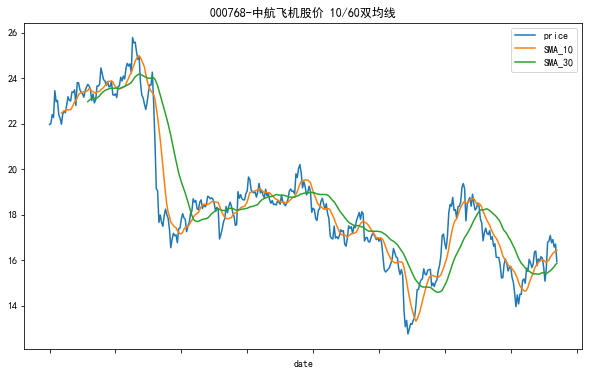

In [10]:
data[['price','SMA_10','SMA_30']].plot(title = '000768-中航飞机股价 10/60双均线', figsize=(10, 6))

## 2、交易策略

In [11]:
data['position_1'] = np.where(data['SMA_10'] > data['SMA_30'], 1, 0)

In [12]:
data.head()

,price,SMA_10,SMA_30,position_1
date,,,,
2017-01-03,21.959,NaN,NaN,0
2017-01-04,22.008,NaN,NaN,0
2017-01-05,22.395,NaN,NaN,0
2017-01-06,22.266,NaN,NaN,0
2017-01-09,23.447,NaN,NaN,0


In [13]:
data['position_2'] = np.where(data['price'] > data['SMA_10'], 1, 0)
data.head()

,price,SMA_10,SMA_30,position_1,position_2
date,,,,,
2017-01-03,21.959,NaN,NaN,0,0
2017-01-04,22.008,NaN,NaN,0,0
2017-01-05,22.395,NaN,NaN,0,0
2017-01-06,22.266,NaN,NaN,0,0
2017-01-09,23.447,NaN,NaN,0,0


In [14]:
data.dropna(inplace = True)
data.head()

,price,SMA_10,SMA_30,position_1,position_2
date,,,,,
2017-02-20,23.724,23.4506,22.961933,1,1
2017-02-21,23.655,23.5369,23.018467,1,1
2017-02-22,23.506,23.5071,23.068400,1,0
2017-02-23,23.010,23.4287,23.088900,1,0
2017-02-24,23.298,23.4089,23.123300,1,0


In [15]:
data['position'] = np.where(data['position_1'] + data['position_2'] == 2, 1 , 0)

In [16]:
data.head()

,price,SMA_10,SMA_30,position_1,position_2,position
date,,,,,,
2017-02-20,23.724,23.4506,22.961933,1,1,1
2017-02-21,23.655,23.5369,23.018467,1,1,1
2017-02-22,23.506,23.5071,23.068400,1,0,0
2017-02-23,23.010,23.4287,23.088900,1,0,0
2017-02-24,23.298,23.4089,23.123300,1,0,0


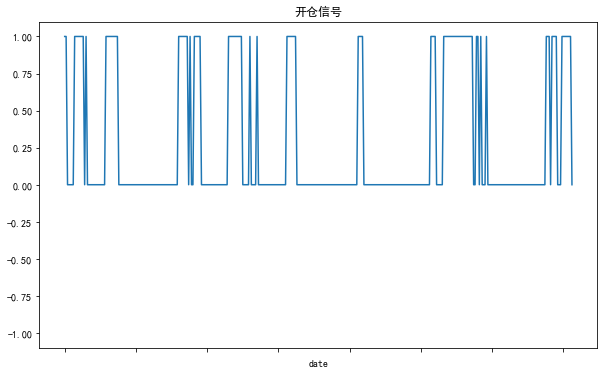

In [17]:
data['position'].plot(ylim=[-1.1, 1.1], title = '开仓信号', figsize=(10, 6))

## 3、收益及可视化

In [18]:
data['returns'] = np.log(data['price'] / data['price'].shift(1))

In [19]:
data.head()

,price,SMA_10,SMA_30,position_1,position_2,position,returns
date,,,,,,,
2017-02-20,23.724,23.4506,22.961933,1,1,1,NaN
2017-02-21,23.655,23.5369,23.018467,1,1,1,-0.002913
2017-02-22,23.506,23.5071,23.068400,1,0,0,-0.006319
2017-02-23,23.010,23.4287,23.088900,1,0,0,-0.021327
2017-02-24,23.298,23.4089,23.123300,1,0,0,0.012439


In [20]:
data['strategy'] = data['position'].shift(1) * data['returns']  

In [21]:
data[['returns', 'strategy']].sum()

returns    -0.398283
strategy   -0.160742
dtype: float64

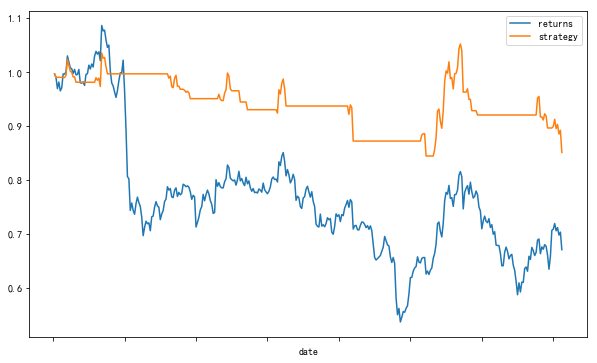

In [22]:
data[['returns', 'strategy']].cumsum().apply(np.exp).plot(figsize=(10, 6)) 